# Task-2 Dataset-2 : Delhi Weather Data
###    By: Harsh Sagar Garg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
weather_df = pd.read_csv("delhi-weather-data/testset.csv")


#### Checking the initial shape of the dataframe

In [3]:
weather_df.shape

(100990, 20)

In [4]:
weather_df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


### Addidng Time Date Month and Year

In [5]:
date = pd.to_datetime(weather_df['datetime_utc'])
weather_df.insert(0,'Year',date.dt.year)
weather_df.insert(1,'Month',date.dt.month)
weather_df.insert(2,'Day',date.dt.day)
weather_df.insert(3,'Hour',date.dt.hour)

In [6]:
weather_df.head()

,Year,Month,Day,Hour,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996,11,1,11,19961101-11:00,Smoke,9.0,0,0,NaN,...,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996,11,1,12,19961101-12:00,Smoke,10.0,0,0,NaN,...,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996,11,1,13,19961101-13:00,Smoke,11.0,0,0,NaN,...,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996,11,1,14,19961101-14:00,Smoke,10.0,0,0,NaN,...,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996,11,1,16,19961101-16:00,Smoke,11.0,0,0,NaN,...,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


####  Checking shape after adding 4 columns of Year, Month, Day and Hour respctively

In [7]:
print(weather_df.shape)

(100990, 24)


### Dropping redundant columns

In [8]:
#### Drop datetime_utc
weather_df=weather_df.drop(['datetime_utc'],axis=1)

In [9]:
#### Drop _precipm as it is completely 0
weather_df=weather_df.drop([' _precipm'],axis=1)

In [10]:
weather_df.head()

,Year,Month,Day,Hour,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996,11,1,11,Smoke,9.0,0,0,NaN,27.0,...,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996,11,1,12,Smoke,10.0,0,0,NaN,32.0,...,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996,11,1,13,Smoke,11.0,0,0,NaN,44.0,...,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996,11,1,14,Smoke,10.0,0,0,NaN,41.0,...,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996,11,1,16,Smoke,11.0,0,0,NaN,47.0,...,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


####  Checking shape after dropping 2 columns of datetime_utc,  _precipm respctively

In [11]:
weather_df.shape

(100990, 22)

## Detecting Outliers

In [12]:
plt.style.use('Solarize_Light2')

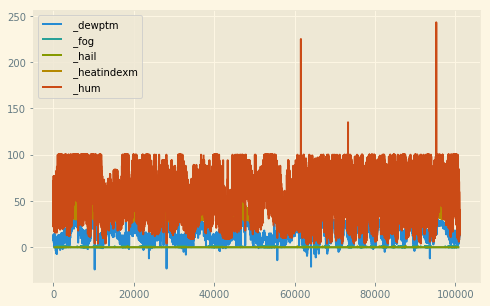

In [13]:
weather_df[weather_df.columns[4:10]].plot(figsize=(8,5))
plt.show()

#### ^ Here we can clearly see that there are some outliers, we will remove them now

### REMOVING Outliers

In [14]:
df=weather_df[[' _hail',' _rain',' _snow',' _tornado',' _thunder', ' _fog' ]]

In [15]:
weather_df=weather_df.drop([' _wdire',' _conds',' _hail',' _tornado',' _rain',' _snow',' _thunder',' _fog'],axis=1)

In [16]:
Q1=weather_df.quantile(0.05)
Q3=weather_df.quantile(0.95)

In [17]:
IQR=Q3-Q1
##print(IQR)

In [18]:
refined_df = weather_df[~((weather_df < (Q1 - 1.5 * IQR)) |(weather_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
refined_df.head()

,Year,Month,Day,Hour,_dewptm,_heatindexm,_hum,_pressurem,_tempm,_vism,_wdird,_wgustm,_windchillm,_wspdm
0,1996,11,1,11,9.0,NaN,27.0,1010.0,30.0,5.0,280.0,NaN,NaN,7.4
3,1996,11,1,14,10.0,NaN,41.0,1010.0,24.0,2.0,0.0,NaN,NaN,NaN
4,1996,11,1,16,11.0,NaN,47.0,1011.0,23.0,1.2,0.0,NaN,NaN,0.0
5,1996,11,1,17,12.0,NaN,56.0,1011.0,21.0,NaN,0.0,NaN,NaN,NaN
6,1996,11,1,18,13.0,NaN,60.0,1010.0,21.0,0.8,0.0,NaN,NaN,0.0


In [20]:
refined_df.shape

(99925, 14)

In [21]:
plt.style.use('bmh')


#### From the below graph we can see that now majority of the outliners have been removed

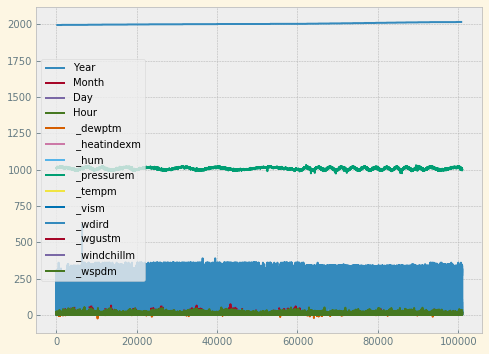

In [22]:
refined_df.plot(figsize=(8,6))
plt.show()

### Plot of different numeric features like rain, snow, dewptm, etc.

In [23]:
refined_df=refined_df.join(df)

In [24]:
monthwise=refined_df.groupby('Month')

In [25]:
data_month=monthwise.mean()

In [26]:
measure=refined_df.columns[4:]

In [27]:
plt.style.use('fivethirtyeight')

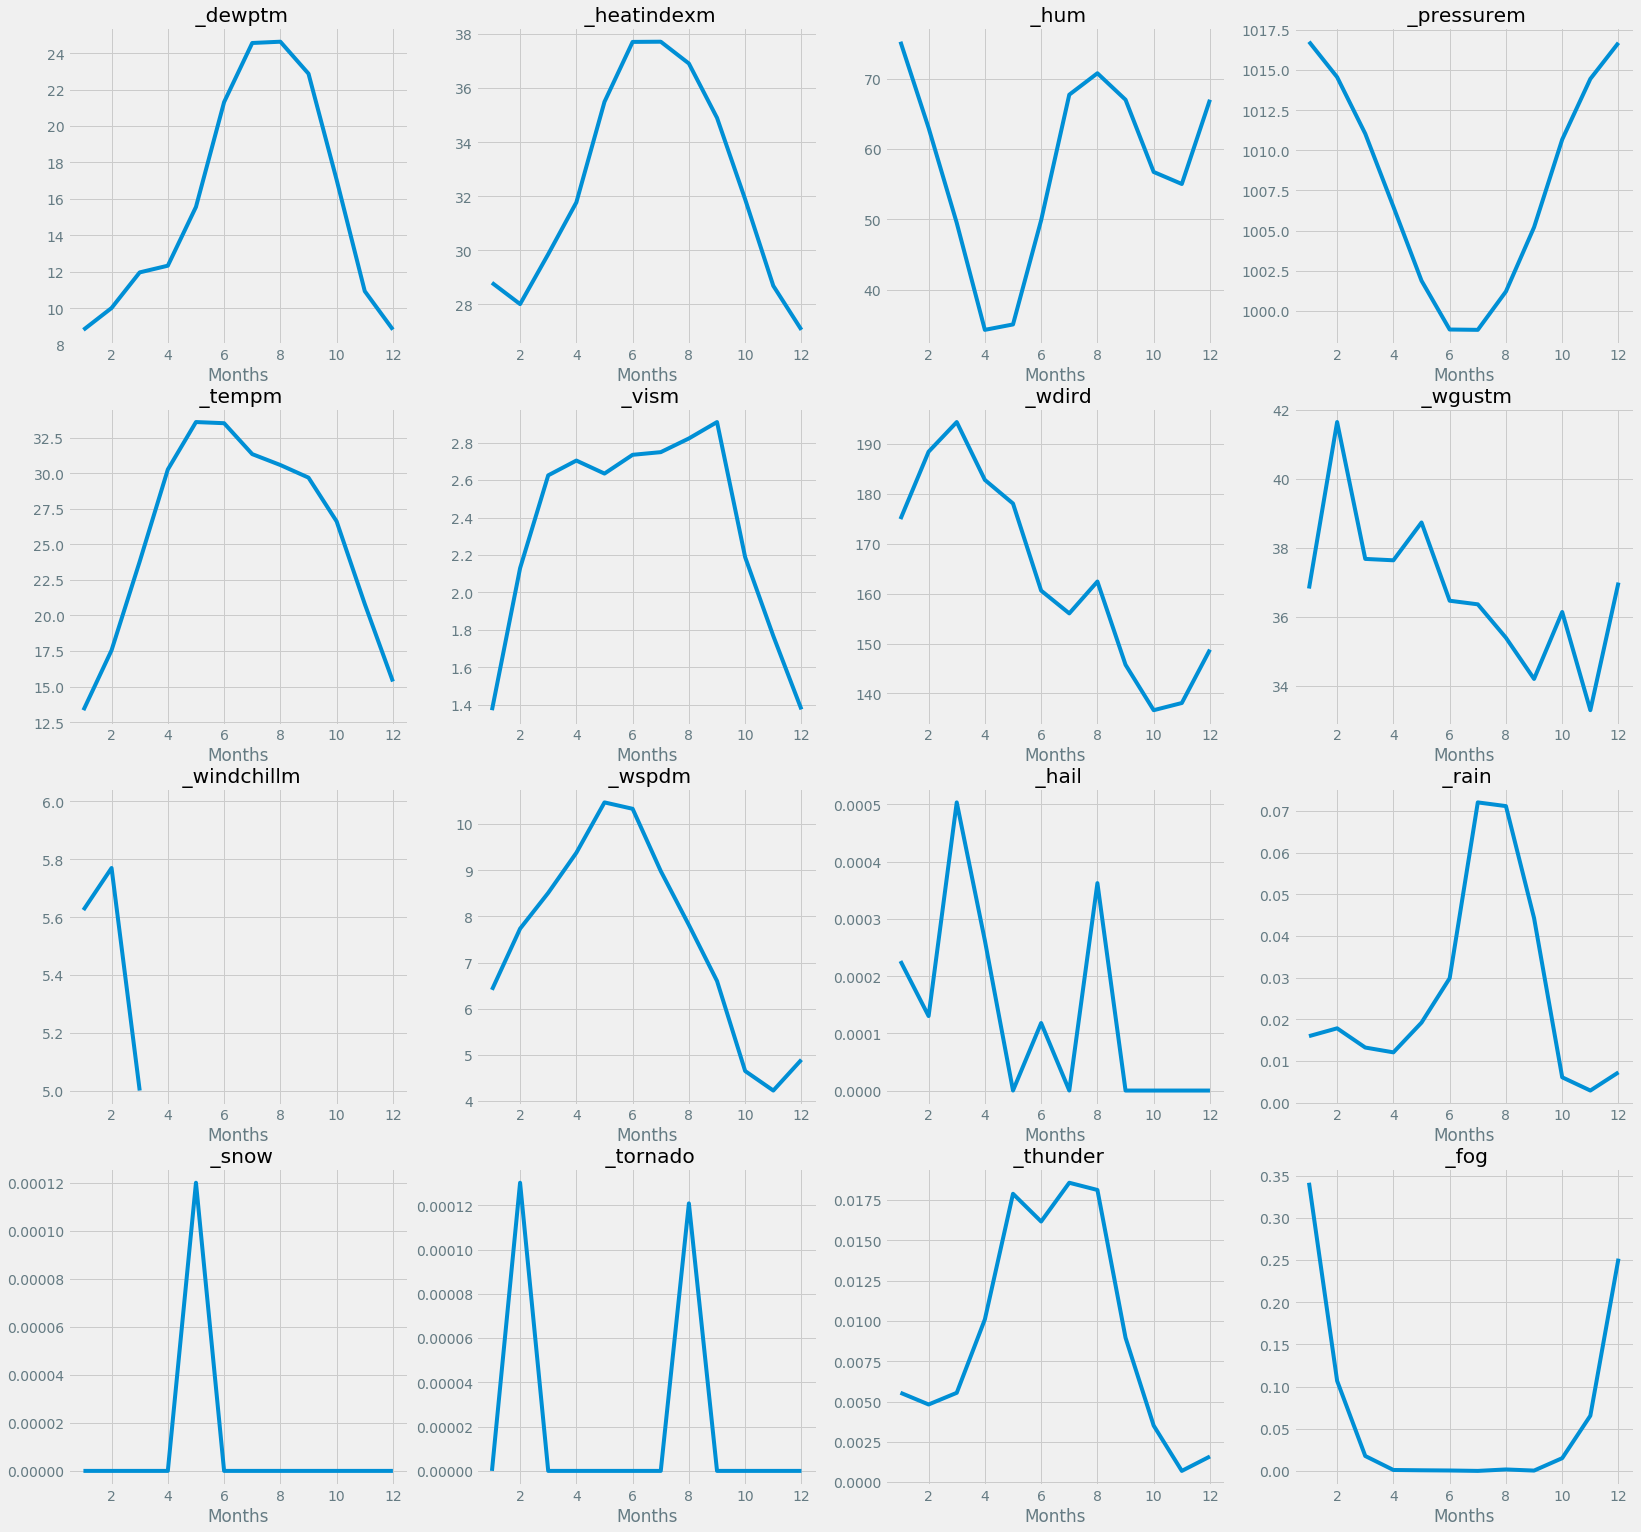

In [28]:
plt.subplots(nrows=4,ncols=4,figsize=(25,25))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(data_month[measure[i]])
    plt.title(measure[i])
    plt.xlabel('Months')
    
plt.show()

# Pie charts for different weather conditions in a month

In [29]:
weather_pie_df=pd.read_csv("delhi-weather-data/testset.csv")

In [30]:
date = pd.to_datetime(weather_pie_df['datetime_utc'])
weather_pie_df.insert(0,'Year',date.dt.year)
weather_pie_df.insert(1,'Month',date.dt.month)
weather_pie_df.insert(2,'Day',date.dt.day)
weather_pie_df.insert(3,'Hour',date.dt.hour)

In [31]:
weather_pie_df=weather_pie_df.drop(['datetime_utc'],axis=1)

In [32]:
grps=weather_pie_df[['Month',' _conds']]

In [33]:
mon=grps.groupby('Month')

In [34]:
dur_data={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'September',10:'October',11:'November',12:'December'}

In [35]:
colors=['Red','Blue','Green','Orange','Yellow','Gray']

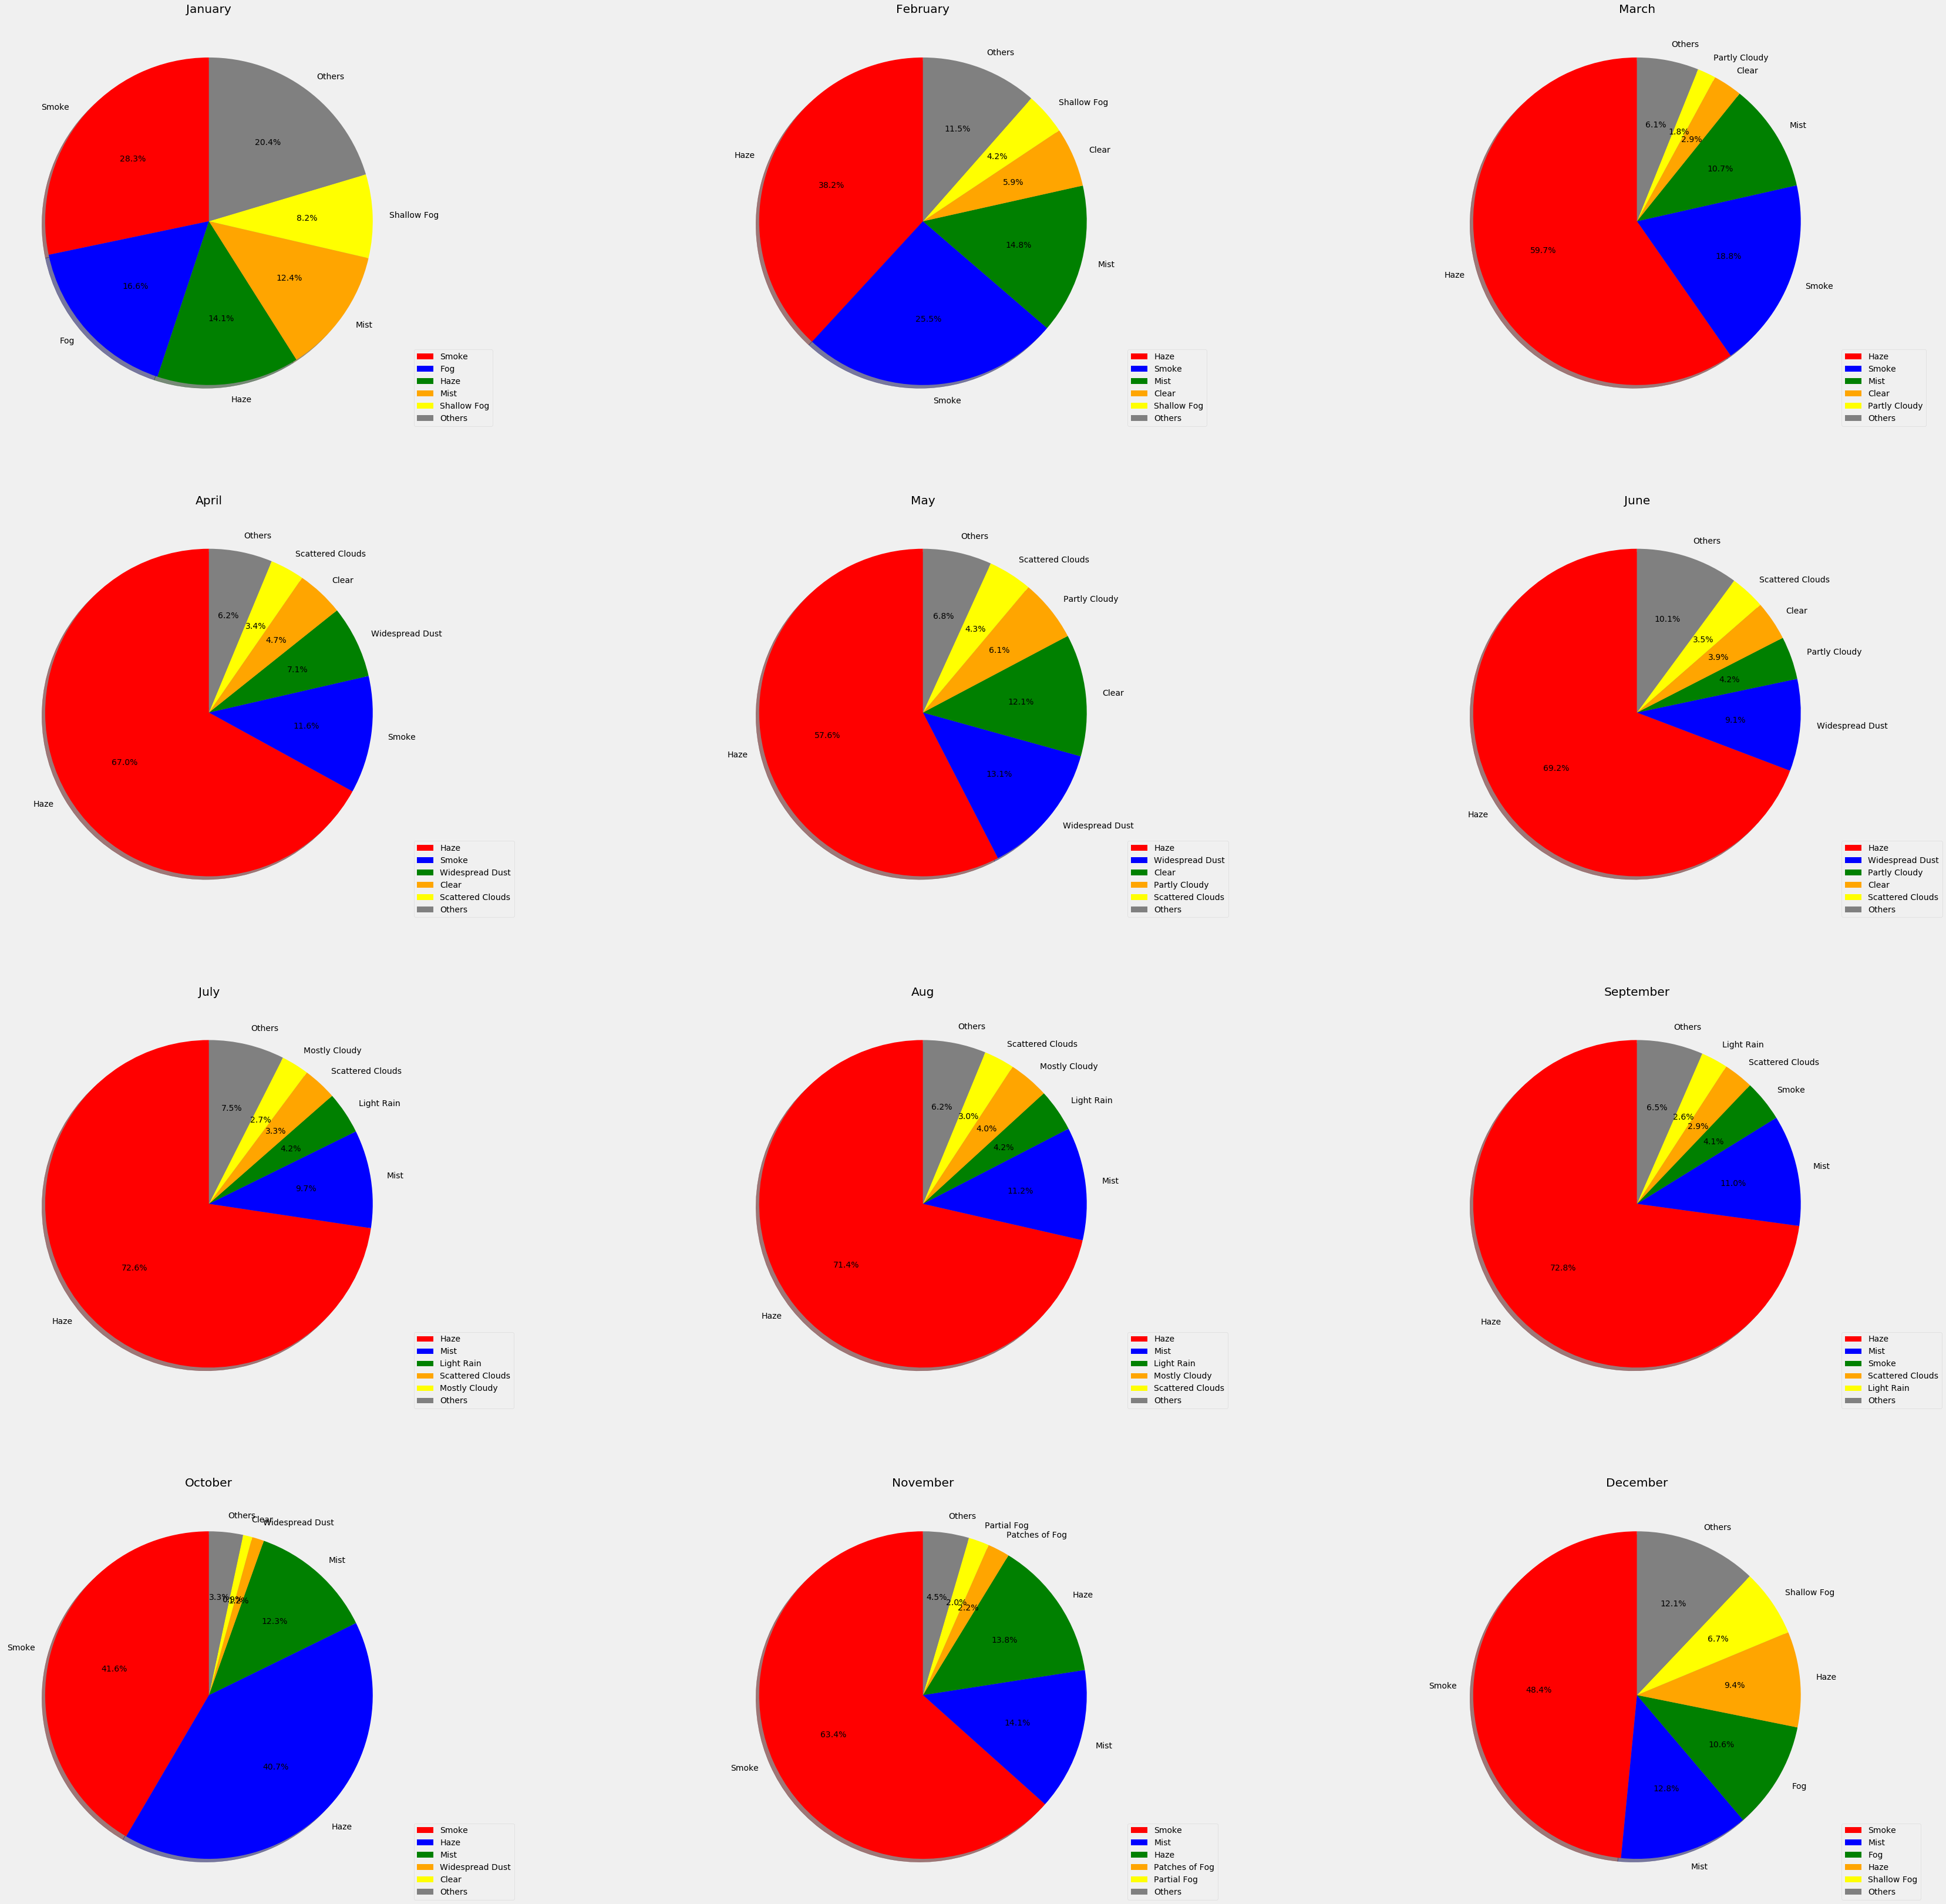

In [36]:
plt.subplots(figsize=(55,55))
count = int(1)
for i,group in mon:
    plt.subplot(4,3,count)  
    plt.title(dur_data[i])
    month_d = group[' _conds'].value_counts(sort=True, ascending=False)

    labels = month_d.index.tolist()[:5]
    sizes = month_d.tolist()[:5]
    
    labels.append('Others')
    sizes.append(sum(month_d.tolist()[6:]))
    
    plt.pie(sizes, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%',startangle=90)
    count = count+1
    plt.legend(loc=(1,0))
plt.show()
